In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

%run backwards_time_voter_model.ipynb

In [3]:
L = 200
alpha = 1e-3
kernel = 'fat tail'
W = 5
etas = [-3, -10]

all_species = []

for eta in etas:
    species = voter_model_fast(L, alpha, kernel=kernel, W=W, eta=eta)
    all_species.append(species)

  6%|██▏                                 | 2467/40000 [00:01<00:25, 1456.27it/s]


In [7]:
all_grids =[]

for species in all_species:
    species_ids = np.random.uniform(size=len(species))
    print(len(species))

    grid = np.zeros((L, L))
    for i, specie in enumerate(species):
        for coord in specie:
            grid[coord] = species_ids[i]

    all_grids.append(grid)



45
32


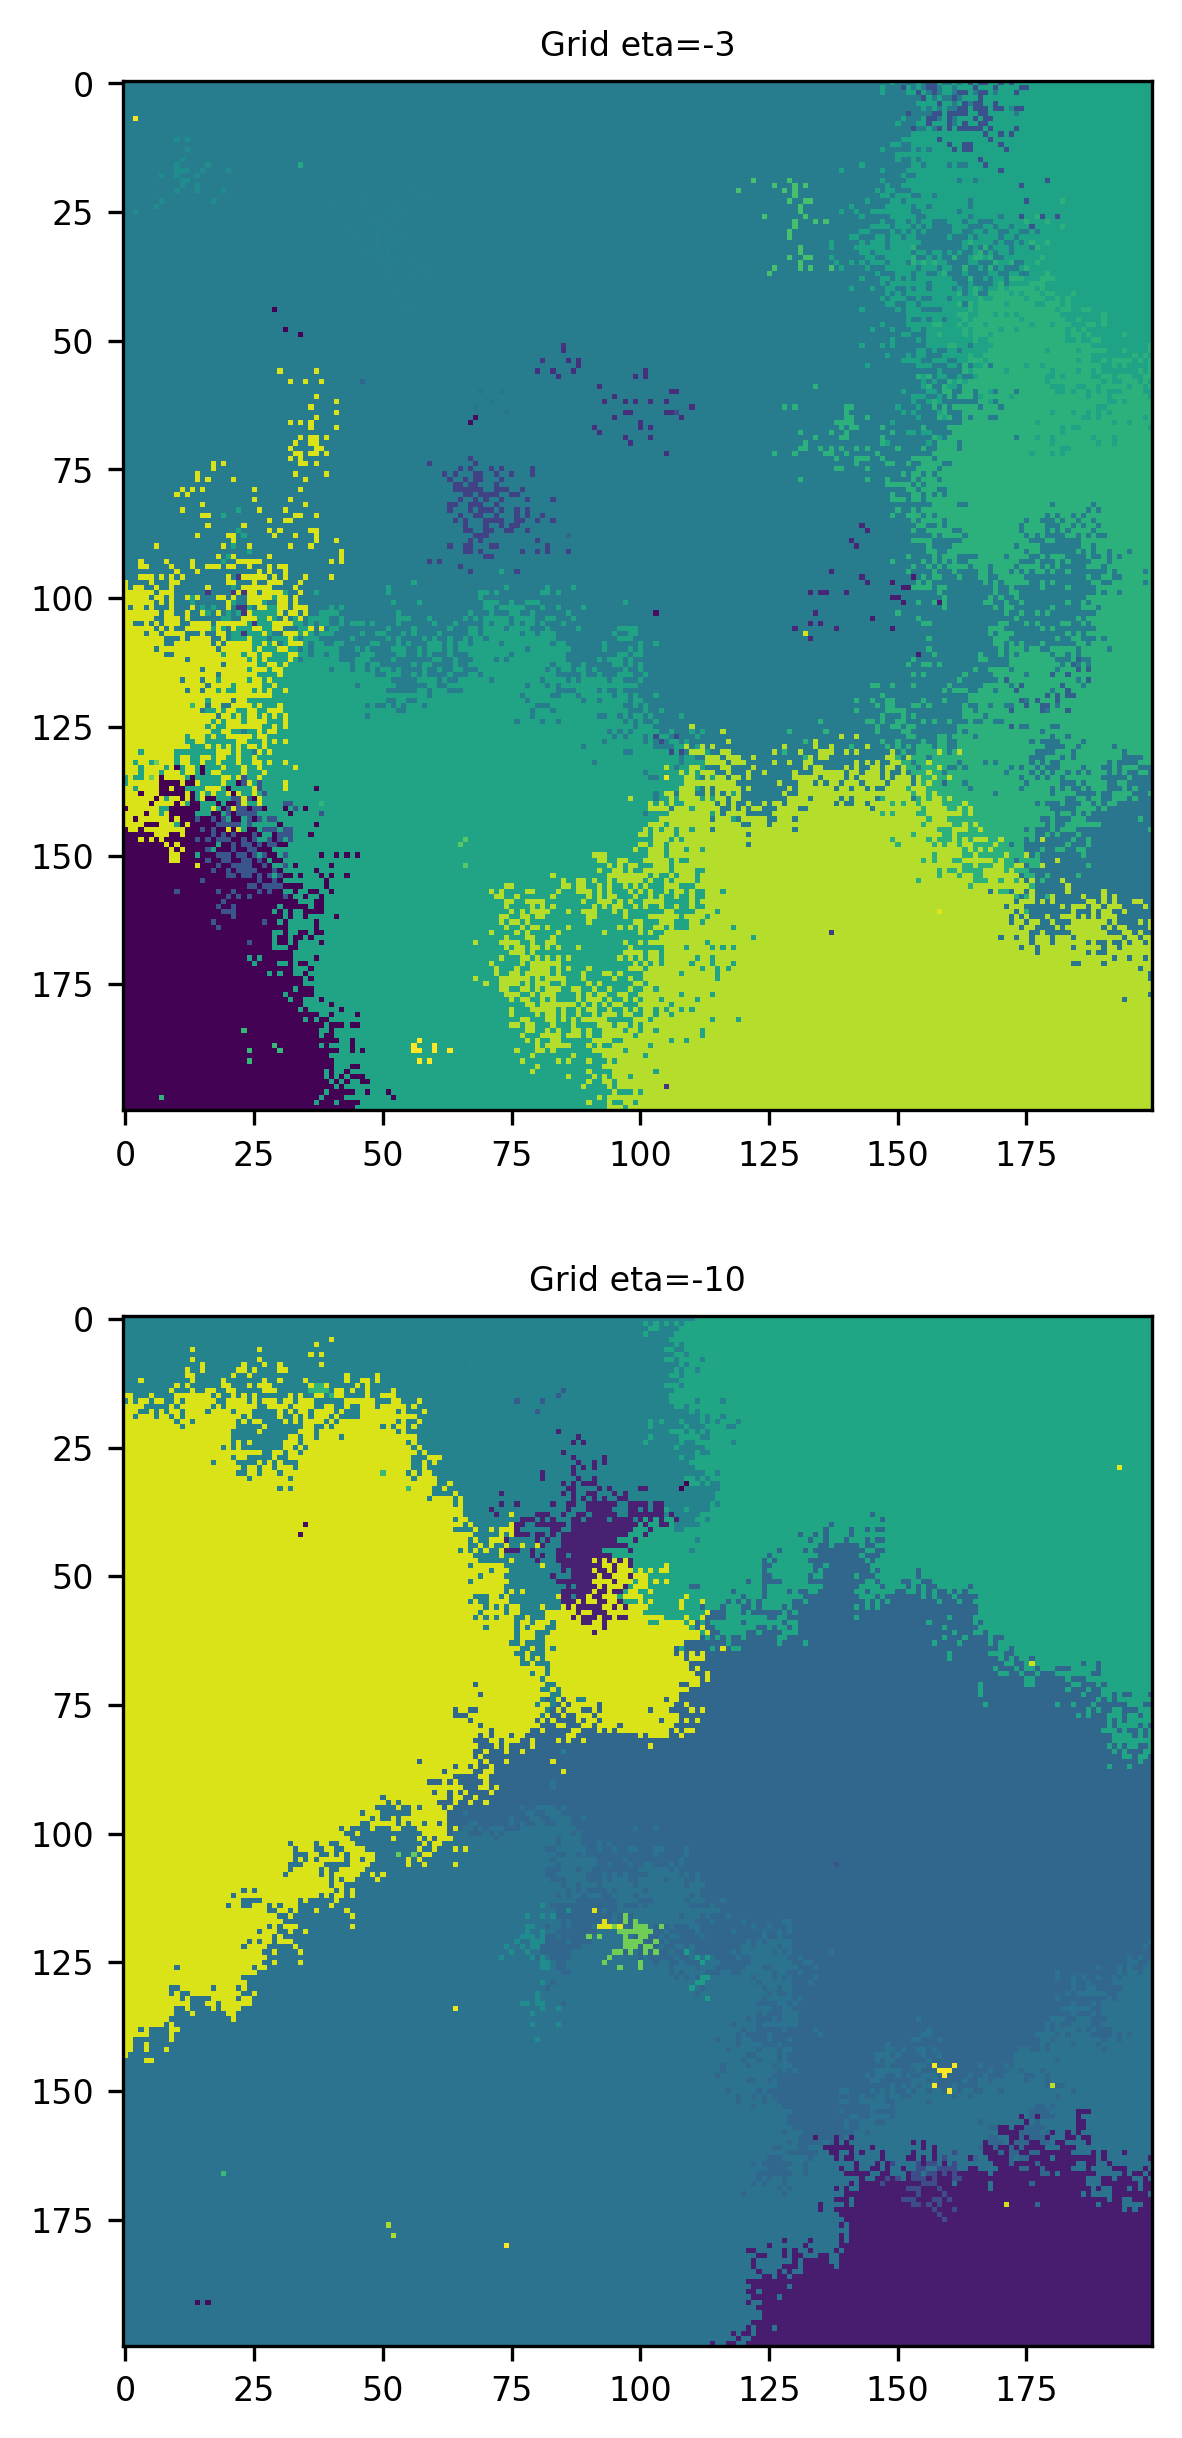

In [8]:
# Plot ecosystem visualization as 2D grid; before vs. after n iterations

mpl.rc('font', size=8)

fig, axs = plt.subplots(len(etas), 1, figsize = (10,10))

for i,eta in enumerate(etas):
        axs[i].imshow(all_grids[i])
        axs[i].set_title(f'Grid eta={eta}', fontsize = 8)
        axs[i].tick_params(axis='x', labelsize=8)
        axs[i].tick_params(axis='y', labelsize=8)
        

plt.show()

In [9]:
end_1 = 12
start_2 = 25

color = ['k', 'r']

for i, grid in enumerate(all_grids):
        areas, num_species = sa_curve(grid)
        spec_std_dev = np.std(num_species, axis=0)
        spec_mean = np.mean(num_species, axis=0)

        poly_coeffs1 = np.polyfit(np.log(areas)[:end_1], np.log(spec_mean)[:end_1], 1)
        poly_coeffs2 = np.polyfit(np.log(areas)[start_2:], np.log(spec_mean)[start_2:], 1)
        # poly_coeffs = np.polyfit(np.log(areas), np.log(spec_mean), 1)
        p1 = np.poly1d(poly_coeffs1)
        p2 = np.poly1d(poly_coeffs2)
        print(p1, p2)        

        plt.loglog(areas, list(spec_mean), label=f'Mean of 10 centers (eta={etas[i]})')

        plt.loglog([areas[0], areas[end_1]],
                np.exp(poly_coeffs1[1])*np.array([areas[0], areas[end_1]])**poly_coeffs1[0],
                linestyle='dashed',
                color=color[i],
                label=f'Lin. regress, f(x)={p1} (eta={etas[i]})')

        plt.loglog([areas[start_2], areas[-1]],
                np.exp(poly_coeffs2[1])*np.array([areas[start_2], areas[-1]])**poly_coeffs2[0],
                linestyle='dashed',
                color=color[i],
                label=f'Lin. regress, f(x)={p2} (eta={etas[i]})')
        
        plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev (eta={etas[i]})')

plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}, kernel={kernel}, alpha={alpha}')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

TypeError: sa_curve() missing 1 required positional argument: 'n_centers'

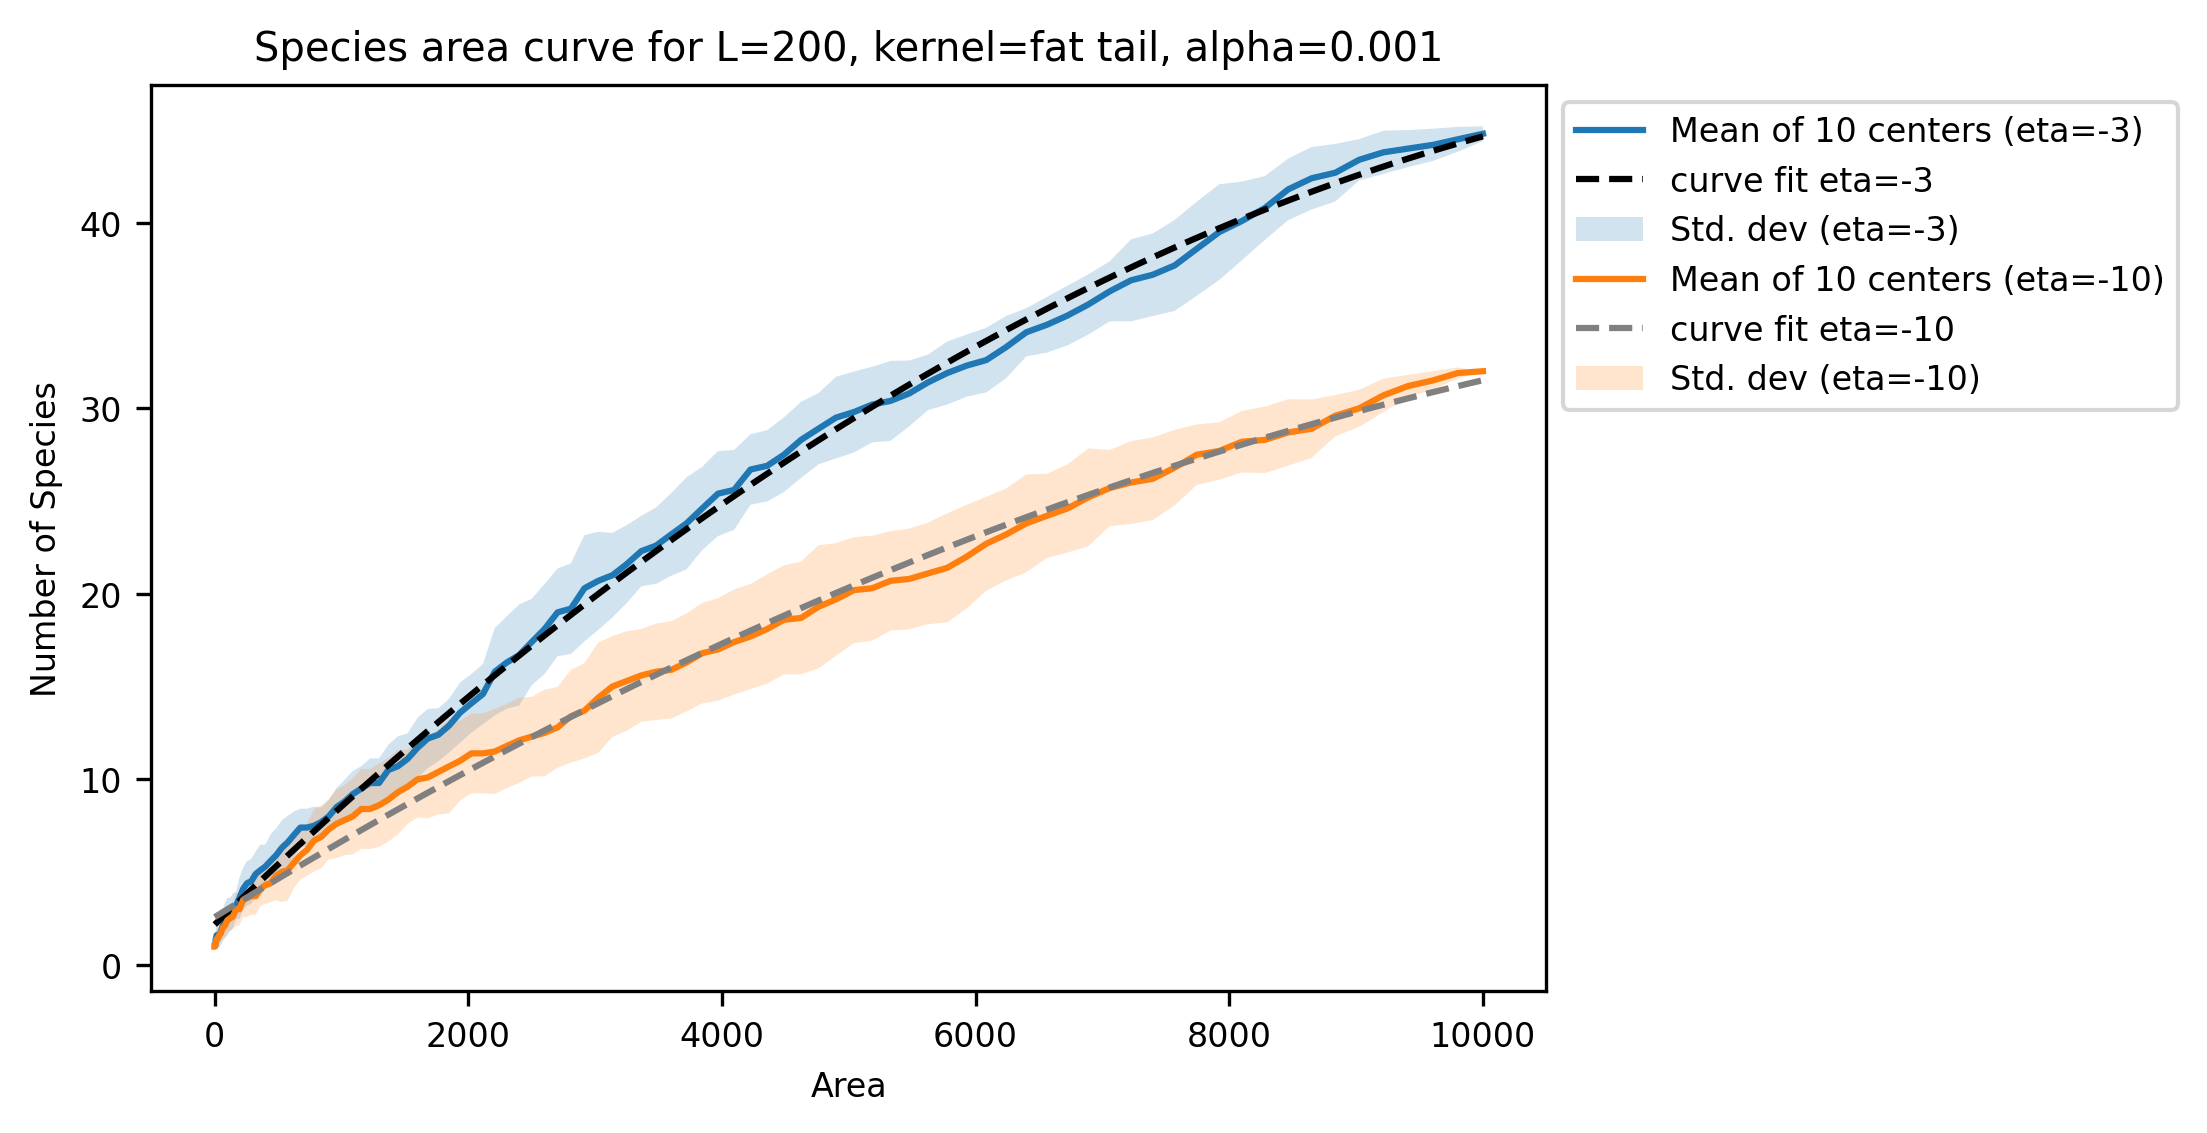

In [11]:
from scipy.optimize import curve_fit

def model_f(x,a,b,c):
    return a*(x-b)**2+c

color = ['k', 'grey']

n_centers = 10
for i, grid in enumerate(all_grids):
        areas, num_species = sa_curve(grid, n_centers)
        spec_std_dev = np.std(num_species, axis=0)
        spec_mean = np.mean(num_species, axis=0)

        popt, pcov = curve_fit(model_f, areas, spec_mean, p0=[1,5,-3])

        a_opt, b_opt, c_opt = popt
        x_model = np.linspace(min(areas), max(areas), 100)
        y_model = model_f(x_model, a_opt, b_opt, c_opt) 


        plt.plot(areas, list(spec_mean), label=f'Mean of 10 centers (eta={etas[i]})')

        plt.plot(x_model, y_model, color=color[i], linestyle='dashed', label=f'curve fit eta={etas[i]}')

        # plt.plot([areas[0], areas[end_1]],
        #         np.exp(poly_coeffs1[1])*np.array([areas[0], areas[end_1]])**poly_coeffs1[0],
        #         linestyle='dashed',
        #         color=color[i],
        #         label=f'Lin. regress, f(x)={p1} (eta={etas[i]})')

        # plt.plot([areas[start_2], areas[-1]],
        #         np.exp(poly_coeffs2[1])*np.array([areas[start_2], areas[-1]])**poly_coeffs2[0],
        #         linestyle='dashed',
        #         color=color[i],
        #         label=f'Lin. regress, f(x)={p2} (eta={etas[i]})')
        
        plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev (eta={etas[i]})')

plt.ylabel('Number of Species')
plt.xlabel('Area')
plt.title(f'Species area curve for L={L}, kernel={kernel}, alpha={alpha}')
plt.legend(bbox_to_anchor=(1,1))
plt.show()